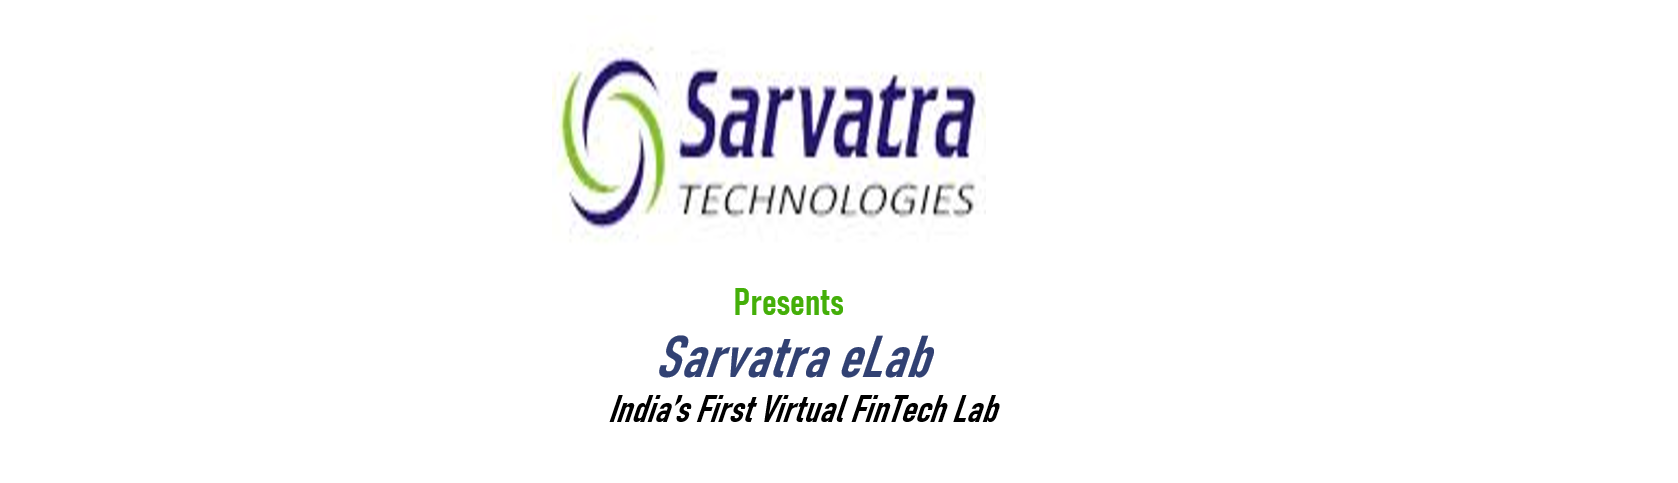

### <center>We would like to thank <b><i>SARVATRA TECHNOLOGIES</i></b> for giving us this oppurtunity to work on an industry level project.It has been an enriching and educational experience for us.</center>

# **<center>TIME SERIES FORECASTING FOR ANOMALY DETECTION**
* Presented By<br>
1.  Aamir Miyajiwala<br>
2.  Aditi Nagar


###<center> **Problem Statement**</center>

####<center><I>"Predict the Debit Card Transaction Volume using TimeSeries for Anomaly Detection."</center></I>

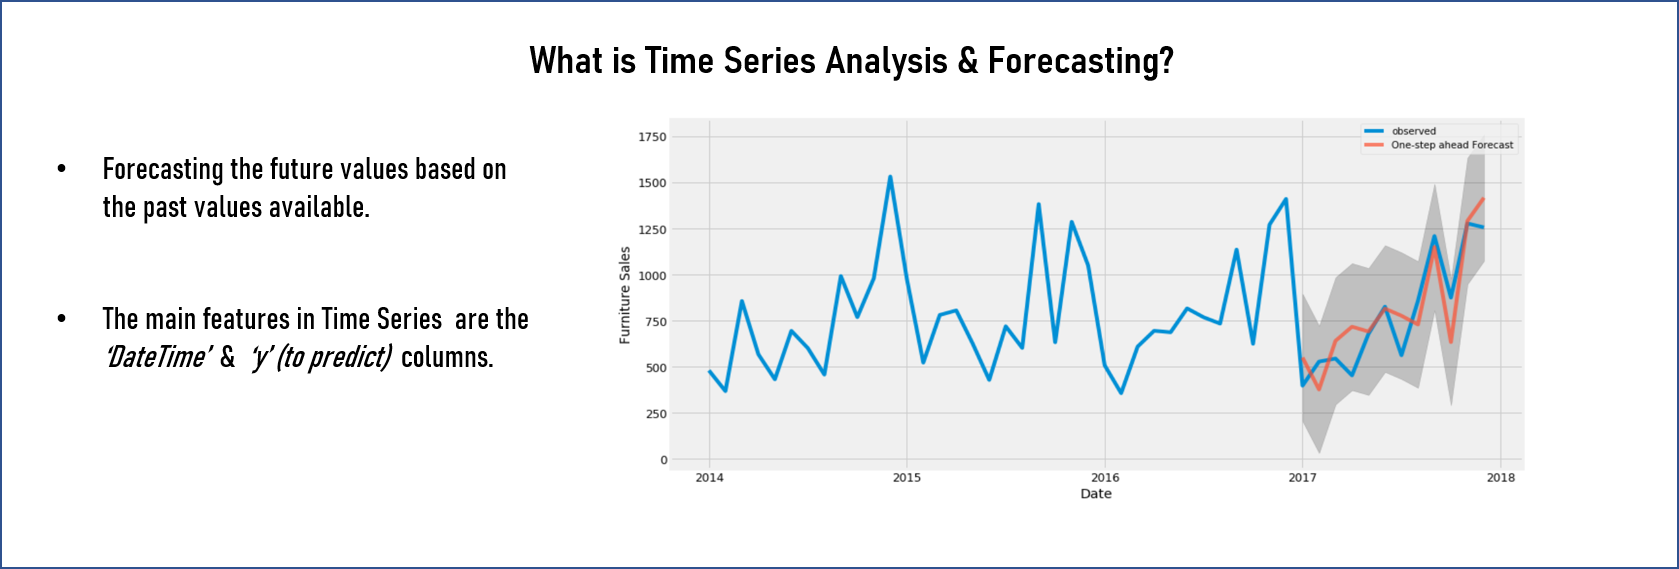

### **<center>Outliers?**

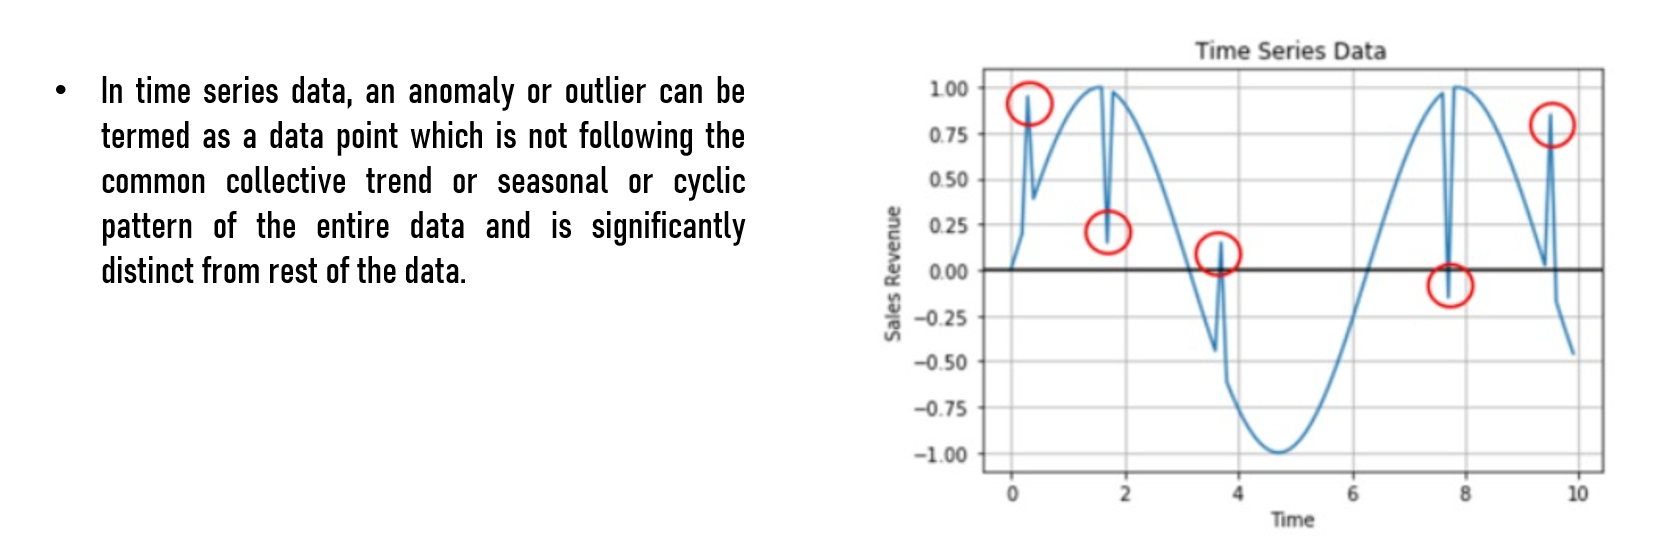

####**<center>The DATASET we had** </center>

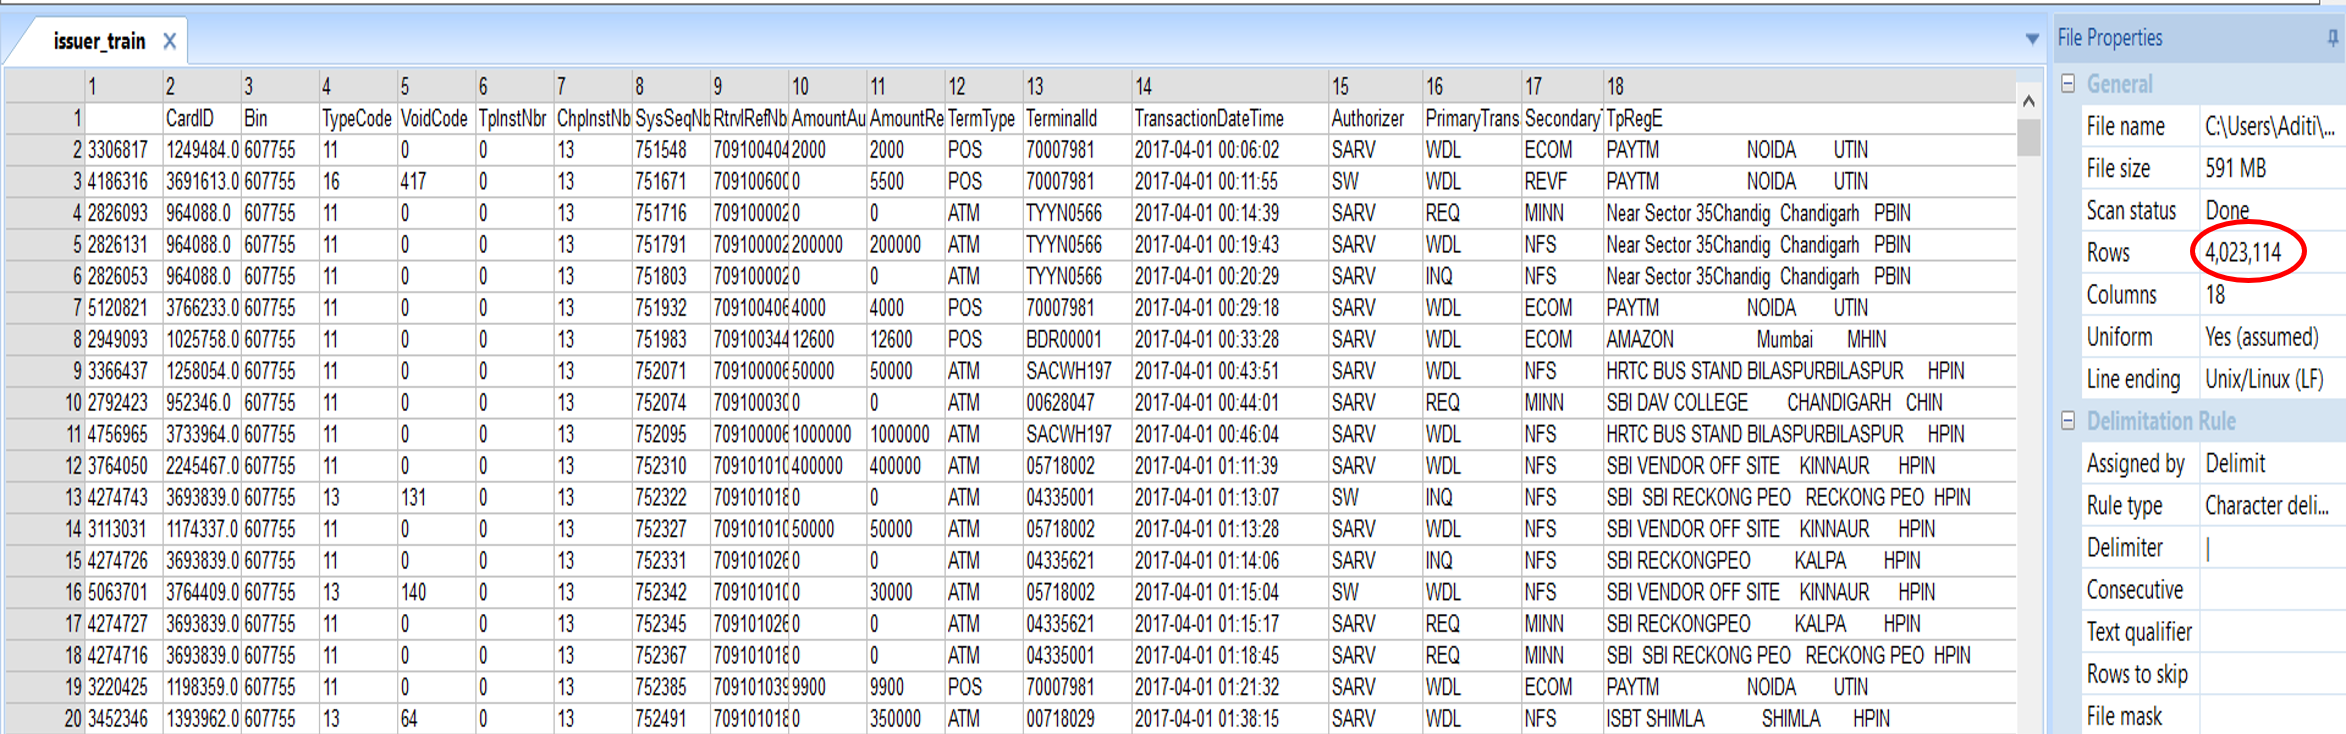

So there were <b>4,023,114</b> rows & <b>18</b> columns.
We extracted the data needed for <i>'TimeSeries'</i> & made new dataframe.

The data we needed was the <b>DateTime(every hour)</b> of the transactions happening & the <b>Volume</b> of Transactions happening at the respective datetime.



###<center> **CREATING NEW DATAFRAME**<center>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving d.csv to d.csv


In [ ]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['d.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2

,DateTime,volume
0,2017-04-01 00:00:00,10
1,2017-04-01 01:00:00,12
2,2017-04-01 02:00:00,5
3,2017-04-01 03:00:00,5
4,2017-04-01 04:00:00,17
...,...,...
11563,2018-07-31 19:00:00,545
11564,2018-07-31 20:00:00,874
11565,2018-07-31 21:00:00,386
11566,2018-07-31 22:00:00,223


### Here, in the dataset which we've created, we got <b>11568 </b> rows(dates)

###<center>**EDA (Exploratory Data Analysis)**</center>

There were total <b>16 Months </b> of Data we got after the extraction of data from previous Dataframe.

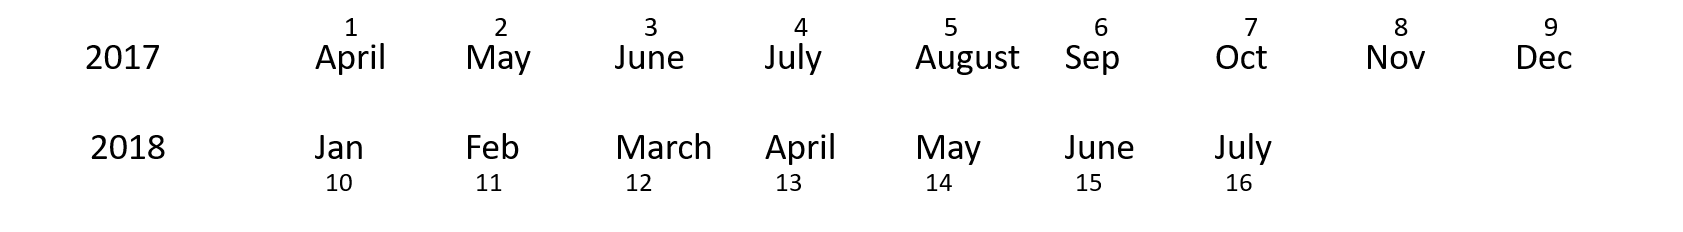

###**Missing Values**

After some Exploratory Analysis we found out that we've got some Missing Values in our data.


*No of rows(hours) in Dataset Created: <b>11568</b>


*Actual rows(hours) Expected: <b>11688</b>

*Difference(Missing values):<b>120</b>

After filling up the Missing Values, our New DataFrame looked something like this!

In [ ]:
df3 = pd.read_csv('complete_df.csv')
df3

,DateTime,volume
0,01-04-2017 00:00,10
1,01-04-2017 01:00,12
2,01-04-2017 02:00,5
3,01-04-2017 03:00,5
4,01-04-2017 04:00,17
...,...,...
11683,31-07-2018 19:00,545
11684,31-07-2018 20:00,874
11685,31-07-2018 21:00,386
11686,31-07-2018 22:00,223


###<b><center>Data Visulalization</b></center>

In [ ]:
import plotly
import plotly.graph_objects as go

df3['DateTime']=pd.to_datetime(df3['DateTime'],dayfirst=True)
# Create random data with numpy
fig = go.Figure()
trace1=go.Scatter(x=df3['DateTime'], y=df3['volume'],
                     mode='lines',
                     name='Prophet')

data=[trace1]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)


plotly.offline.iplot(fig)

###**Observations we made.**

* We see high peaks in <b> Starting of the month</b>
* We see high volume of transactions at <b> DayTime</b>
* We see low volume of transactions in <b> Night</b>
* We see high peaks on <b>WEEKDAYS</b>
* We see low peaks on <b> WEEKENDS</b> 
* <b>Holidays </b> & <b>Festivals </b> have a special impact on no of transactions.

###<center>**Plotting Trend & Seasonality of our Dataset**</center>


*<i>Trend: The increasing or decreasing value in the series.

*<i>Seasonality: The repeating short-term cycle in the series.


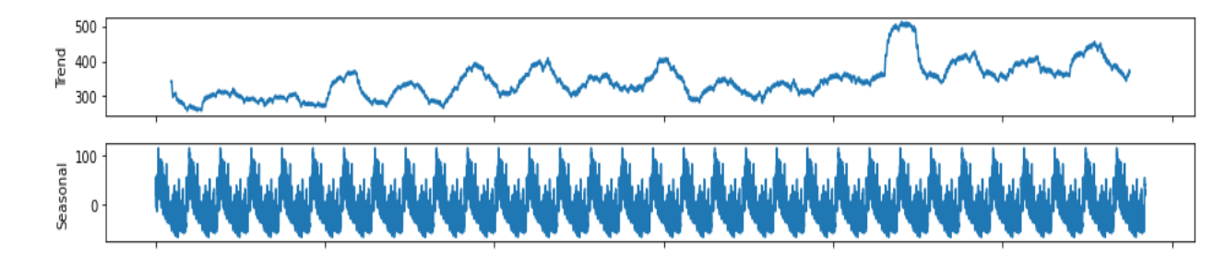

####<center>One way of doing anomaly detection with time series data is by building a predictive model using the historical data to estimate and get a sense of the overall common trend, seasonal or cyclic pattern of the time series data.

###<b><center>Next Step : <i>TRAINING - VALIDATION - TESTING</i>

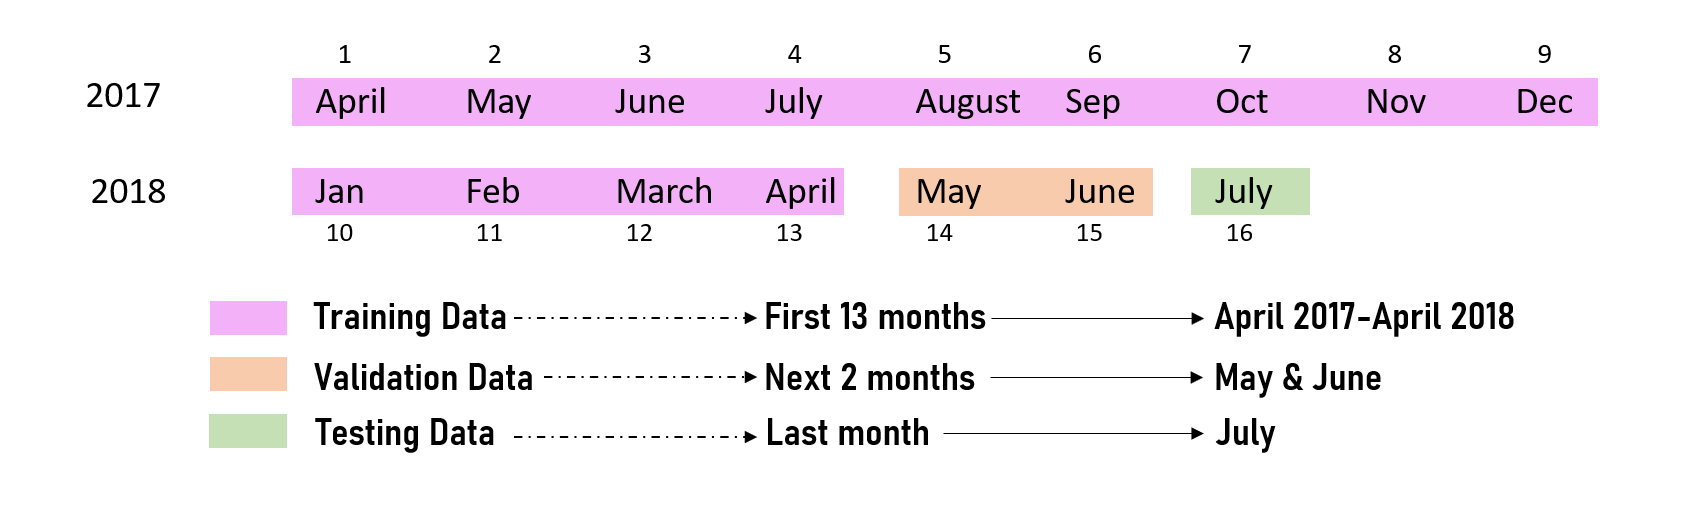

#### <b>Training set:</b> A set of examples used for learning, that is to fit the parameters of the model.

####<b> Validation set:</b> A set of examples used to tune the parameters of a model, for example to choose the number of hidden units in a neural network.

#### <b>Test set:</b> A set of examples used only to assess the performance of a fully-specified model.

##**<center>TIMESERIES MODELS**</center>

###<center>Time Series Models can be Categorized as <i>Univariate</i> & <I>Multivariate</i> Models</center>

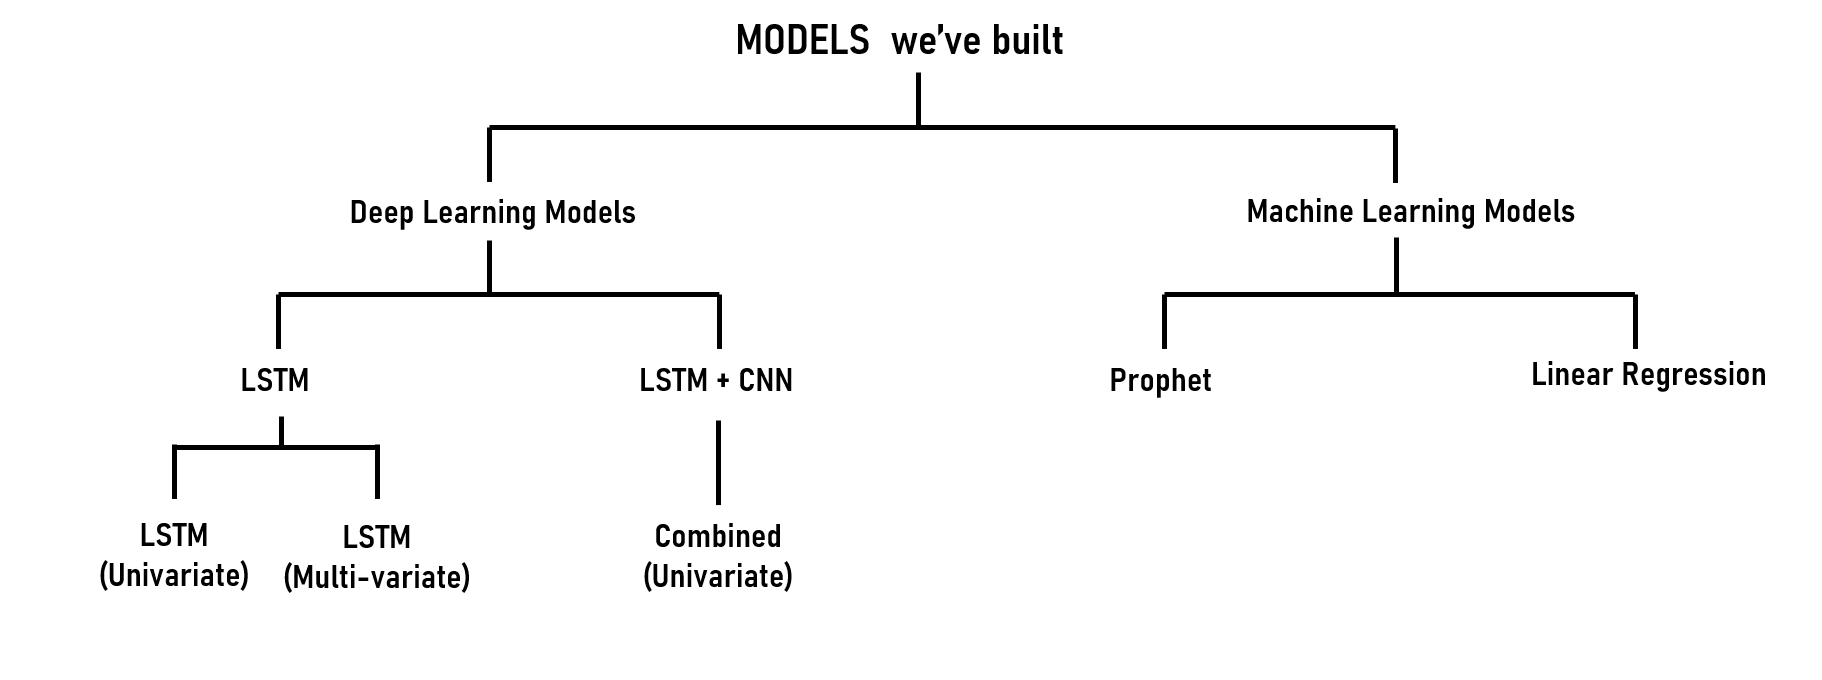

###**<center><u>1. LSTM (Long Short Term Memory)**</u>
<center> <i>UNIVARIATE MODEL

In <b> <i>Univariate LSTM </b></i> model, we had only two columns <b><i>(DateTime) & (Volume)

In [ ]:
df4['dates']=pd.to_datetime(df4['dates'],dayfirst=True)

import plotly
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()
trace2=go.Scatter(x=df4['dates'], y=df4['actual'],
                     mode='lines',
                     name='Actual Data')
trace1=go.Scatter(x=df4['dates'], y=df4['multilstm'],
                    mode='lines',
                    name='LSTM(Univariate)')

data=[trace2,trace1]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_text="LSTM UNIVARIATE MODEL")


plotly.offline.iplot(fig)

**Observations**

1) Univariate LSTM didn't worked good at <u>low values, especially at night.</u>


### <center>**<u>2. LSTM+CNN (Combined Model)**</u>

<center><i>UNIVARIATE MODEL</i>

In <b>Combined Model</b> too, we had only two columns <b>(DateTime) & (Volume)</b>, but the <b>functionalities of both the models were merged</b>.

In [ ]:
df4['dates']=pd.to_datetime(df4['dates'],dayfirst=True)

import plotly
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()
trace2=go.Scatter(x=df4['dates'], y=df4['actual'],
                     mode='lines',
                     name='Actual Data')
trace1=go.Scatter(x=df4['dates'], y=df4['combined'],
                    mode='lines',
                    name='LSTM+CNN (combined)')

data=[trace2,trace1]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_text="LSTM+CNN Combined UNIVARIATE MODEL")


plotly.offline.iplot(fig)

**Observations**

1)<u>Functionalities of 2 models</u> were combined in a single model.

2)Worked <u>better at lower values</u> as compared to LSTM ,but not as good as Prophet.

### <center>**<u>3. LSTM(Long Short Term Memory)**</u>

<center><i>MULTIVARIATE MODEL</i>

Based on the above results of Univariate Model & the Observations recorded in the EDA part, we created <b>new Features</b> for our model.

In [ ]:
import io
import pandas as pd
# Dataset is now stored in a Pandas Dataframe
df3 = pd.read_csv('presentationfinal.csv')
df3=df3.set_index('DateTime')
#Here datetime is index and rest all the columns are features
df3

,month,day,weekday,start_of_month,end_of_month,is_weekend,holidays,hour,dawn,morning,noon,afternoon,evening,midnight,volume
DateTime,,,,,,,,,,,,,,,
01-04-2017 00:00,4,1,5,1,0,1,0,0,0,0,0,0,0,1,10
01-04-2017 01:00,4,1,5,1,0,1,0,1,0,0,0,0,0,1,12
01-04-2017 02:00,4,1,5,1,0,1,0,2,1,0,0,0,0,0,5
01-04-2017 03:00,4,1,5,1,0,1,0,3,1,0,0,0,0,0,5
01-04-2017 04:00,4,1,5,1,0,1,0,4,1,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-07-2018 19:00,7,31,1,0,1,0,0,19,0,0,0,0,1,0,545
31-07-2018 20:00,7,31,1,0,1,0,0,20,0,0,0,0,1,0,874
31-07-2018 21:00,7,31,1,0,1,0,0,21,0,0,0,0,1,0,386


In [ ]:
df4['dates']=pd.to_datetime(df4['dates'],dayfirst=True)

import plotly
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()
trace2=go.Scatter(x=df4['dates'], y=df4['actual'],
                     mode='lines',
                     name='Actual Data')
trace1=go.Scatter(x=df4['dates'], y=df4['multilstm'],
                    mode='lines',
                    name='LSTM(Multivariate)')

data=[trace2,trace1]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_text="LSTM MULTIVARIATE MODEL")



plotly.offline.iplot(fig)

**Observations**

1)Works <u>best of all </u>models.

2)Can be improved for <u>lower values.</u>

## **<center>Technique adopted for timeseries**

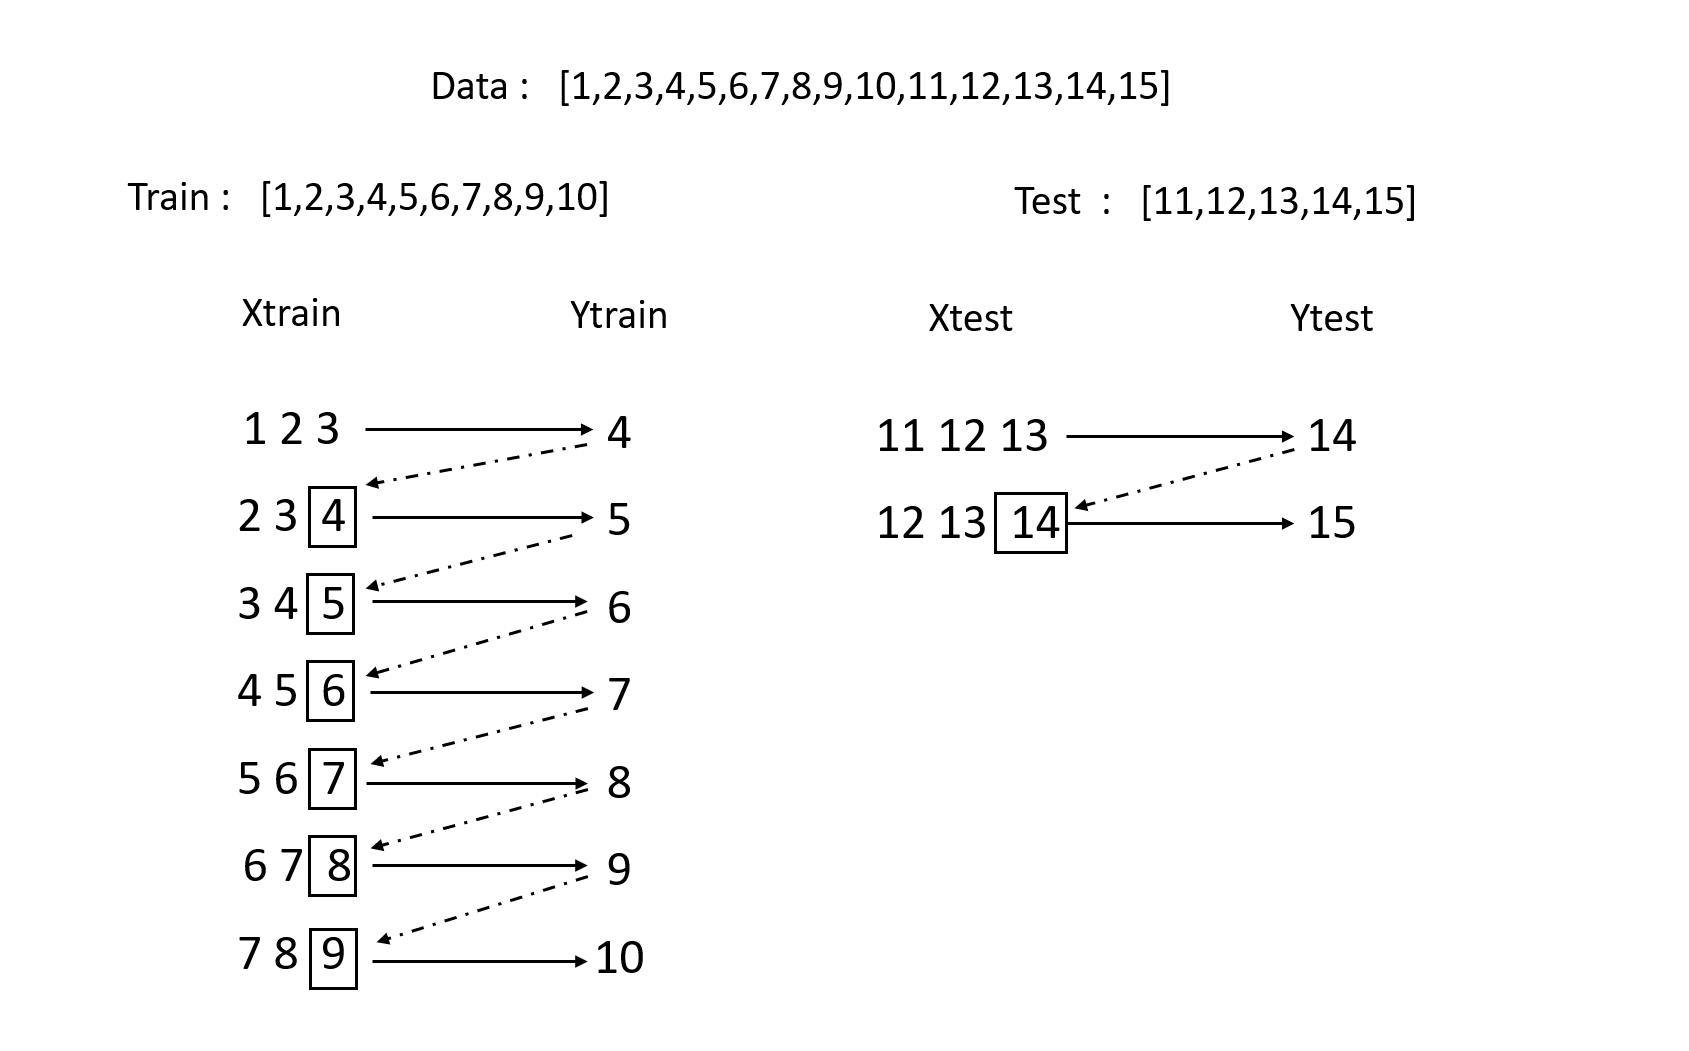

### <center>**<u>4. Facebook's Prophet**</u>

In Prophet</b> too, we had only two columns <b>(DateTime) & (Volume)</b>, but an additional in built feature of <b> adding the holidays</b> was added.

In [ ]:
df4['dates']=pd.to_datetime(df4['dates'],dayfirst=True)

import plotly
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()
trace2=go.Scatter(x=df4['dates'], y=df4['actual'],
                     mode='lines',
                     name='Actual Data')
trace1=go.Scatter(x=df4['dates'], y=df4['Prophet'],
                    mode='lines',
                    name='PROPHET(Univariate)')

data=[trace2,trace1]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_text="PROPHET UNIVARIATE MODEL")



plotly.offline.iplot(fig)

**Observations**

1)<u>Holiday feature</u> was a bonus for the model.

2)It <u>worked great at lower values</u> as compared to LSTM univariate model.

3)<u>Not good</u> at <i>"high peaks" and "Sundays".</i>

### <center>**<u>5. Linear Regression**</u>


In [ ]:
import io
import pandas as pd
df6=pd.read_csv("july_full_month.csv")


df6['dates']=pd.to_datetime(df6['dates'],dayfirst=True)

import plotly
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()
trace2=go.Scatter(x=df6['dates'], y=df6['actual'],
                     mode='lines',
                     name='Actual Data')
trace1=go.Scatter(x=df6['dates'], y=df6['linear_regression'],
                    mode='lines',
                    name='Linear Regression')

data=[trace2,trace1]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_text="LINEAR REGRESSION MODEL")



plotly.offline.iplot(fig)

##<b><center> Forecasted Results of July</b></center>

After building the models, we stored the <b>Results of July</b> in single Dataset to compare it with the <b>Actual</b> values.

Let's have a look!

In [ ]:
import io
import pandas as pd
df4 = pd.read_csv('july_full_month.csv')
df4

,dates,actual,multilstm,unilstm,combined,Prophet,linear_regression
0,01-07-2018 00:00,50,65.515468,50.094660,29.868502,11.241468,53.029526
1,01-07-2018 01:00,29,51.415611,36.078983,15.348757,6.187068,51.500958
2,01-07-2018 02:00,4,45.532130,31.597067,6.897926,4.332970,51.365987
3,01-07-2018 03:00,2,46.483541,23.880520,5.522593,4.463289,51.365987
4,01-07-2018 04:00,22,56.574617,21.465666,10.258657,7.183477,51.365987
...,...,...,...,...,...,...,...
739,31-07-2018 19:00,545,585.313797,424.524230,485.983830,525.950441,403.314356
740,31-07-2018 20:00,874,355.313019,295.506160,223.451280,278.459684,268.693563
741,31-07-2018 21:00,386,331.660055,400.919530,241.536290,130.530963,154.114467
742,31-07-2018 22:00,223,205.639101,179.115750,107.739970,59.987401,73.238834


In [ ]:
df4['dates']=pd.to_datetime(df4['dates'],dayfirst=True)

import plotly
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()
trace2=go.Scatter(x=df4['dates'], y=df4['actual'],
                     mode='lines',
                     name='Actual Data')
trace1=go.Scatter(x=df4['dates'], y=df4['unilstm'],
                    mode='lines',
                    name='LSTM(Univariate)')
trace3=go.Scatter(x=df4['dates'], y=df4['multilstm'],
                    mode='lines',
                    name='LSTM(Multivariate)')
trace4=go.Scatter(x=df4['dates'], y=df4['combined'],
                    mode='lines',
                    name='LSTM+CNN(combined)')
trace5=go.Scatter(x=df4['dates'], y=df4['Prophet'],
                    mode='lines',
                    name='PROPHET')
trace6=go.Scatter(x=df4['dates'], y=df4['linear_regression'],
                    mode='lines',
                    name='Linear Regression')
data=[trace2,trace1,trace3,trace4,trace5,trace6]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)


plotly.offline.iplot(fig)

**Our Next Step?**

*We saw that no Model is Perfect!

*Every Model has it's own Drawback & a Pluspoint as well.

*So, to come up with a conclusion, we decided to improve our models and compare it more precisely on a daily prediction graph.

##**<center>Comparing DAILY GRAPHS**<center>

<center>We saw that <b>Weekends, Weekdays, Day, Night, Start of the Month & Holidays</b> have special impact on the volume of transactions happening.</center>

<center>Hence, we've choosen 4 days based on the above observations to compare our models more precisely on daily basis.</center>

<B>July 2: This day is the <u>first weekday of the month.</u>

July 5: This is a <u>normal Weekday without Irregular Peaks</u>

July 8: It is <u> SUNDAY</u>

July 31: This is <u> full of Irregular Peaks</u>



### <center>**1] JULY 2**</center>

In [ ]:
import io
import pandas as pd
df8 = pd.read_csv('july2.csv')
df8['Date']=pd.to_datetime(df8['Date'],dayfirst=True)
df8

,Date,Actual,Ensemble,UniLstm,MultiLstm,Prophet,Linear
0,2018-07-02 00:00:00,8,13.945005,0.209301,2.263515,11.947214,28.887884
1,2018-07-02 01:00:00,6,8.758101,-4.142873,-2.011493,6.521363,27.359317
2,2018-07-02 02:00:00,2,16.569181,-3.821517,1.258502,4.630082,27.359317
3,2018-07-02 03:00:00,2,12.134016,-1.631845,5.443874,4.927807,27.359317
4,2018-07-02 04:00:00,13,11.552831,2.396311,21.481196,8.240833,27.359317
5,2018-07-02 05:00:00,19,48.707287,10.341539,54.482119,19.636543,37.375341
6,2018-07-02 06:00:00,69,62.054561,28.904078,104.802914,54.505973,84.534139
7,2018-07-02 07:00:00,182,126.625247,75.669639,236.952230,143.637462,147.008208
8,2018-07-02 08:00:00,372,304.935644,180.689032,594.019983,316.890762,372.002500
9,2018-07-02 09:00:00,741,507.621928,360.302818,1129.286492,564.584689,732.586656


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("ENSEMBLE","LSTM (Univariate)", "LSTM (Multivariate)","PROPHET","Linear Regression"))

trace1=go.Scatter(x=df8['Date'], y=df8['Actual'],
                     mode='lines',
                     name='Actual Data',line=dict(color="#db2602"))
trace2=go.Scatter(x=df8['Date'], y=df8['Ensemble'],
                    mode='lines',
                    name='ENSEMBLE',line=dict(color="#0cf543"))
trace3=go.Scatter(x=df8['Date'], y=df8['UniLstm'],
                    mode='lines',
                    name='LSTM (Univariate)0',line=dict(color="#f5d60f"))
trace4=go.Scatter(x=df8['Date'], y=df8['MultiLstm'],
                    mode='lines',
                    name='LSTM (MultiVariate)',line=dict(color="#f105f5"))
trace5=go.Scatter(x=df8['Date'], y=df8['Prophet'],
                    mode='lines',
                    name='PROPHET',line=dict(color="#260af7"))
trace6=go.Scatter(x=df8['Date'], y=df8['Linear'],
                    mode='lines',
                    name='Linear Regression',line=dict(color="#326b69"))
data2=[trace1,trace2]

fig.add_trace(trace1,row=1, col=1)
fig.add_trace(trace2,row=1, col=1)
fig.add_trace(trace1,row=1, col=2)
fig.add_trace(trace3,row=1, col=2)
fig.add_trace(trace1,row=2, col=1)
fig.add_trace(trace4,row=2, col=1)
fig.add_trace(trace1,row=2, col=2)
fig.add_trace(trace5,row=2, col=2)
fig.add_trace(trace1,row=3, col=1)
fig.add_trace(trace6,row=3, col=1)

#data=[trace2,trace1,trace3,trace4,trace5,trace6]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
#fig = go.Figure(data=data, layout=layout)
#fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(height=700, width=1100,
                  title_text="2nd July 2018")

fig.show()

**Observations**

*2nd July graph is full of Irregular Peaks.

*Univariate LSTM gave <b>Negative values</b> and didn't perform well at the peak,just like the ensemble.

*Multivariate LSTM performs considerably well.

### <center>**2] JULY 5**</center>

In [ ]:
import io
import pandas as pd
df6 = pd.read_csv('july5.csv')
df6['Date']=pd.to_datetime(df6['Date'],dayfirst=True)
df6

,Date,Actual,Ensemble,Unilstm,Multilstm,Prophet,Linear
0,2018-07-05 00:00:00,15,23.726570,69.112082,33.653985,14.130000,20.938039
1,2018-07-05 01:00:00,4,12.829680,61.931836,26.045267,7.930000,19.823178
2,2018-07-05 02:00:00,6,18.253395,57.522422,25.170980,5.660000,19.823178
3,2018-07-05 03:00:00,14,31.137333,58.719298,26.771125,11.840000,19.823178
4,2018-07-05 04:00:00,19,24.791729,69.782438,42.582849,9.703145,19.823178
5,2018-07-05 05:00:00,24,58.586868,95.495437,71.389002,22.722814,29.839201
6,2018-07-05 06:00:00,160,107.686419,144.384814,107.864681,62.381774,76.998000
7,2018-07-05 07:00:00,171,158.725307,240.582390,231.482285,162.505948,138.658549
8,2018-07-05 08:00:00,383,333.077067,431.474119,498.123899,351.958279,346.552148
9,2018-07-05 09:00:00,846,626.028575,725.283140,819.707603,611.811669,606.082462


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("ENSEMBLE","LSTM (Univariate)", "LSTM (Multivariate)","PROPHET","Linear Regression"))

trace1=go.Scatter(x=df6['Date'], y=df6['Actual'],
                     mode='lines',
                     name='Actual Data',line=dict(color="#db2602"))
trace2=go.Scatter(x=df6['Date'], y=df6['Ensemble'],
                    mode='lines',
                    name='ENSEMBLE',line=dict(color="#0cf543"))
trace3=go.Scatter(x=df6['Date'], y=df6['Unilstm'],
                    mode='lines',
                    name='LSTM (Univariate)0',line=dict(color="#f5d60f"))
trace4=go.Scatter(x=df6['Date'], y=df6['Multilstm'],
                    mode='lines',
                    name='LSTM (MultiVariate)',line=dict(color="#f105f5"))
trace5=go.Scatter(x=df6['Date'], y=df6['Prophet'],
                    mode='lines',
                    name='PROPHET',line=dict(color="#260af7"))
trace6=go.Scatter(x=df6['Date'], y=df6['Linear'],
                    mode='lines',
                    name='Linear Regression',line=dict(color="#326b69"))
data2=[trace1,trace2]

fig.add_trace(trace1,row=1, col=1)
fig.add_trace(trace2,row=1, col=1)
fig.add_trace(trace1,row=1, col=2)
fig.add_trace(trace3,row=1, col=2)
fig.add_trace(trace1,row=2, col=1)
fig.add_trace(trace4,row=2, col=1)
fig.add_trace(trace1,row=2, col=2)
fig.add_trace(trace5,row=2, col=2)
fig.add_trace(trace1,row=3, col=1)
fig.add_trace(trace6,row=3, col=1)

#data=[trace2,trace1,trace3,trace4,trace5,trace6]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
#fig = go.Figure(data=data, layout=layout)
#fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(height=700, width=1100,
                  title_text="5th July 2018")

fig.show()

**Observations**

*july5 is a normal weekday without irregular peaks

*We can see that multivariate lstm works well over here too.

*While Univaraite LSTM predicts the peak well it doesn't work well for lower values.

*Prophet has done considerably well over here.

### <center>**3] JULY 8**</center>

In [ ]:
import io
import pandas as pd
df5 = pd.read_csv('july8.csv')
df5['Date']=pd.to_datetime(df5['Date'],dayfirst=True)
df5

,Date,Actual,Ensemble,UniLstm,MultiLstm,Prophet,linear
0,2018-07-08 00:00:00,14,16.711636,49.035588,29.950276,11.270350,11.893648
1,2018-07-08 01:00:00,7,10.985438,39.562077,21.623583,6.202964,10.778787
2,2018-07-08 02:00:00,13,10.189024,37.903377,17.499166,4.344103,10.643815
3,2018-07-08 03:00:00,10,21.646744,41.861900,14.987611,4.474756,10.643815
4,2018-07-08 04:00:00,6,10.984437,53.089955,22.787180,7.201933,10.643815
5,2018-07-08 05:00:00,28,46.529229,75.164357,36.160793,16.618788,20.387622
6,2018-07-08 06:00:00,78,83.867375,117.099099,50.245002,45.025387,64.878882
7,2018-07-08 07:00:00,140,119.443041,203.308522,84.898279,115.942975,105.796515
8,2018-07-08 08:00:00,293,219.160860,372.512529,170.157797,248.655579,195.326944
9,2018-07-08 09:00:00,386,434.759169,619.477090,277.729829,428.793754,361.864230


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("ENSEMBLE","LSTM (Univariate)", "LSTM (Multivariate)","PROPHET","Linear Regression"))

trace1=go.Scatter(x=df5['Date'], y=df5['Actual'],
                     mode='lines',
                     name='Actual Data',line=dict(color="#db2602"))
trace2=go.Scatter(x=df5['Date'], y=df5['Ensemble'],
                    mode='lines',
                    name='ENSEMBLE',line=dict(color="#0cf543"))
trace3=go.Scatter(x=df5['Date'], y=df5['UniLstm'],
                    mode='lines',
                    name='LSTM (Univariate)0',line=dict(color="#f5d60f"))
trace4=go.Scatter(x=df5['Date'], y=df5['MultiLstm'],
                    mode='lines',
                    name='LSTM (MultiVariate)',line=dict(color="#f105f5"))
trace5=go.Scatter(x=df5['Date'], y=df5['Prophet'],
                    mode='lines',
                    name='PROPHET',line=dict(color="#260af7"))
trace6=go.Scatter(x=df5['Date'], y=df5['linear'],
                    mode='lines',
                    name='Linear Regression',line=dict(color="#326b69"))

data2=[trace1,trace2]

fig.add_trace(trace1,row=1, col=1)
fig.add_trace(trace2,row=1, col=1)
fig.add_trace(trace1,row=1, col=2)
fig.add_trace(trace3,row=1, col=2)
fig.add_trace(trace1,row=2, col=1)
fig.add_trace(trace4,row=2, col=1)
fig.add_trace(trace1,row=2, col=2)
fig.add_trace(trace5,row=2, col=2)
fig.add_trace(trace1,row=3, col=1)
fig.add_trace(trace6,row=3, col=1)

#data=[trace2,trace1,trace3,trace4,trace5,trace6]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
#fig = go.Figure(data=data, layout=layout)
#fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(height=700, width=1100,
                  title_text="8th July 2018")

fig.show()

**Observations**

*July 8 was a Weekend <u>(Sunday)</u>

*Here, Multivariate LSTM performed best of all

*Prophet predicted good at lower values (similar to LSTM multivariate till some extent) but performed bad at higher peaks.

*Even Ensemble predicted good values but bad at higher peaks.

*LSTM Univariate gave a poor performance.

### <center>**4] JULY 31**</center>

In [ ]:
import io
import pandas as pd
df7 = pd.read_csv('july31.csv')
df7['Date']=pd.to_datetime(df7['Date'],dayfirst=True)
df7

,Date,actual,ensemble,unilstm,multilstm,Prophet,linear
0,2018-07-31 00:00:00,12,20.692614,50.115993,35.806287,15.833697,12.803137
1,2018-07-31 01:00:00,5,10.022970,44.699284,28.343800,8.913662,11.809528
2,2018-07-31 02:00:00,19,19.993694,42.812533,27.928241,6.372699,11.809528
3,2018-07-31 03:00:00,12,27.351128,47.395808,32.183489,6.687504,11.809528
4,2018-07-31 04:00:00,7,16.522096,61.321186,48.774727,10.941516,11.809528
5,2018-07-31 05:00:00,23,49.345015,88.861946,75.815644,25.608770,21.553334
6,2018-07-31 06:00:00,149,96.553728,141.233922,108.192785,70.211389,65.089971
7,2018-07-31 07:00:00,133,197.270410,246.970917,207.548374,182.530460,111.881354
8,2018-07-31 08:00:00,377,388.860800,441.197970,438.826981,394.274027,255.454363
9,2018-07-31 09:00:00,1400,663.495244,692.494717,747.367154,683.159065,504.037399


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("ENSEMBLE","LSTM (Univariate)", "LSTM (Multivariate)","PROPHET","Linear Regression"))

trace1=go.Scatter(x=df7['Date'], y=df7['actual'],
                     mode='lines',
                     name='Actual Data',line=dict(color="#db2602"))
trace2=go.Scatter(x=df7['Date'], y=df7['ensemble'],
                    mode='lines',
                    name='ENSEMBLE',line=dict(color="#0cf543"))
trace3=go.Scatter(x=df7['Date'], y=df7['unilstm'],
                    mode='lines',
                    name='LSTM (Univariate)0',line=dict(color="#f5d60f"))
trace4=go.Scatter(x=df7['Date'], y=df7['multilstm'],
                    mode='lines',
                    name='LSTM (MultiVariate)',line=dict(color="#f105f5"))
trace5=go.Scatter(x=df7['Date'], y=df7['Prophet'],
                    mode='lines',
                    name='PROPHET',line=dict(color="#260af7"))
trace6=go.Scatter(x=df7['Date'], y=df7['linear'],
                    mode='lines',
                    name='Linear Regression',line=dict(color="#326b69"))
data2=[trace1,trace2]

fig.add_trace(trace1,row=1, col=1)
fig.add_trace(trace2,row=1, col=1)
fig.add_trace(trace1,row=1, col=2)
fig.add_trace(trace3,row=1, col=2)
fig.add_trace(trace1,row=2, col=1)
fig.add_trace(trace4,row=2, col=1)
fig.add_trace(trace1,row=2, col=2)
fig.add_trace(trace5,row=2, col=2)
fig.add_trace(trace1,row=3, col=1)
fig.add_trace(trace6,row=3, col=1)

#data=[trace2,trace1,trace3,trace4,trace5,trace6]


updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')
#fig = go.Figure(data=data, layout=layout)
#fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(height=700, width=1100,
                  title_text="31st July 2018")

fig.show()

**Observations**

1.Prophet does well for predicting values during midnight and early morning but doesn't adjust well to weekends.

2.Univariate LSTM does well during the day but predicts very high values during midnight and weekends.

3.Multivariate does considerably well when compared to both Univariate LSTM and prophet at predicting values at midnight and during the day whether it is a weekday or weekend unlike the above models.  

## <center>**Conclusion**

#### <center>After analysing the performance of all the models on different days we can say that <B><u>Multivariate LSTM    </b></u>   performs considerably better than the rest of the models as it gives us the closest representation of the transaction counts for that day.